In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
sns.set_theme(palette='dark')
import warnings
from ipywidgets import interact
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv',index_col='serial number')

In [3]:
df.head()

,account_info,duration_month,Loan,Regularity,Purpose,credit_amount,savings_account,Saving Account,employment_st,Salary,investment,Gender,Status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
serial number,,,,,,,,,,,,,,,,,,,,,,,,
1,BRONZE,6,YES,NO,A40,1169,A65,NaN,A75,852,34.08,M,Umarried,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
2,SILVER,48,YES,YES,A40,5951,A61,72.0,A73,2400,48.00,F,Divorced,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
3,NaN,12,YES,NO,A46,2096,A61,68.0,A74,2078,41.56,M,Umarried,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
4,BRONZE,42,YES,YES,A40,7882,A61,73.0,A74,2380,47.60,M,Umarried,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
5,BRONZE,24,YES,NO,A40,4870,A61,52.0,A73,1756,52.68,M,Umarried,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 1 to 700
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   account_info      427 non-null    object 
 1   duration_month    700 non-null    int64  
 2   Loan              700 non-null    object 
 3   Regularity        700 non-null    object 
 4   Purpose           700 non-null    object 
 5   credit_amount     700 non-null    int64  
 6   savings_account   700 non-null    object 
 7   Saving Account    580 non-null    float64
 8   employment_st     700 non-null    object 
 9   Salary            700 non-null    int64  
 10  investment        700 non-null    float64
 11  Gender            700 non-null    object 
 12  Status            700 non-null    object 
 13  gurantors         700 non-null    object 
 14  resident_since    700 non-null    int64  
 15  property_type     700 non-null    object 
 16  age               700 non-null    int64  
 1

In [5]:
df.isnull().mean()*100

account_info        39.000000
duration_month       0.000000
Loan                 0.000000
Regularity           0.000000
Purpose              0.000000
credit_amount        0.000000
savings_account      0.000000
Saving Account      17.142857
employment_st        0.000000
Salary               0.000000
investment           0.000000
Gender               0.000000
Status               0.000000
gurantors            0.000000
resident_since       0.000000
property_type        0.000000
age                  0.000000
installment_type     0.000000
housing_type         0.000000
credits_no           0.000000
job_type             0.000000
liables              0.000000
telephone            0.000000
foreigner            0.000000
dtype: float64

There are only two features which are having missing values one is categorical and other is numerical.

**We will divide our analysis in three parts**
1. Numerical Data Analysis
2. Categorical Data Analysis
3. Numerical and Categorical Analysis together

In [6]:
num_data = df.select_dtypes(exclude='object')
num_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 1 to 700
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   duration_month  700 non-null    int64  
 1   credit_amount   700 non-null    int64  
 2   Saving Account  580 non-null    float64
 3   Salary          700 non-null    int64  
 4   investment      700 non-null    float64
 5   resident_since  700 non-null    int64  
 6   age             700 non-null    int64  
 7   credits_no      700 non-null    int64  
 8   liables         700 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.7 KB


# Numerical Data Analysis


## Relationship/Correlation with Target Variable (credit_amount)

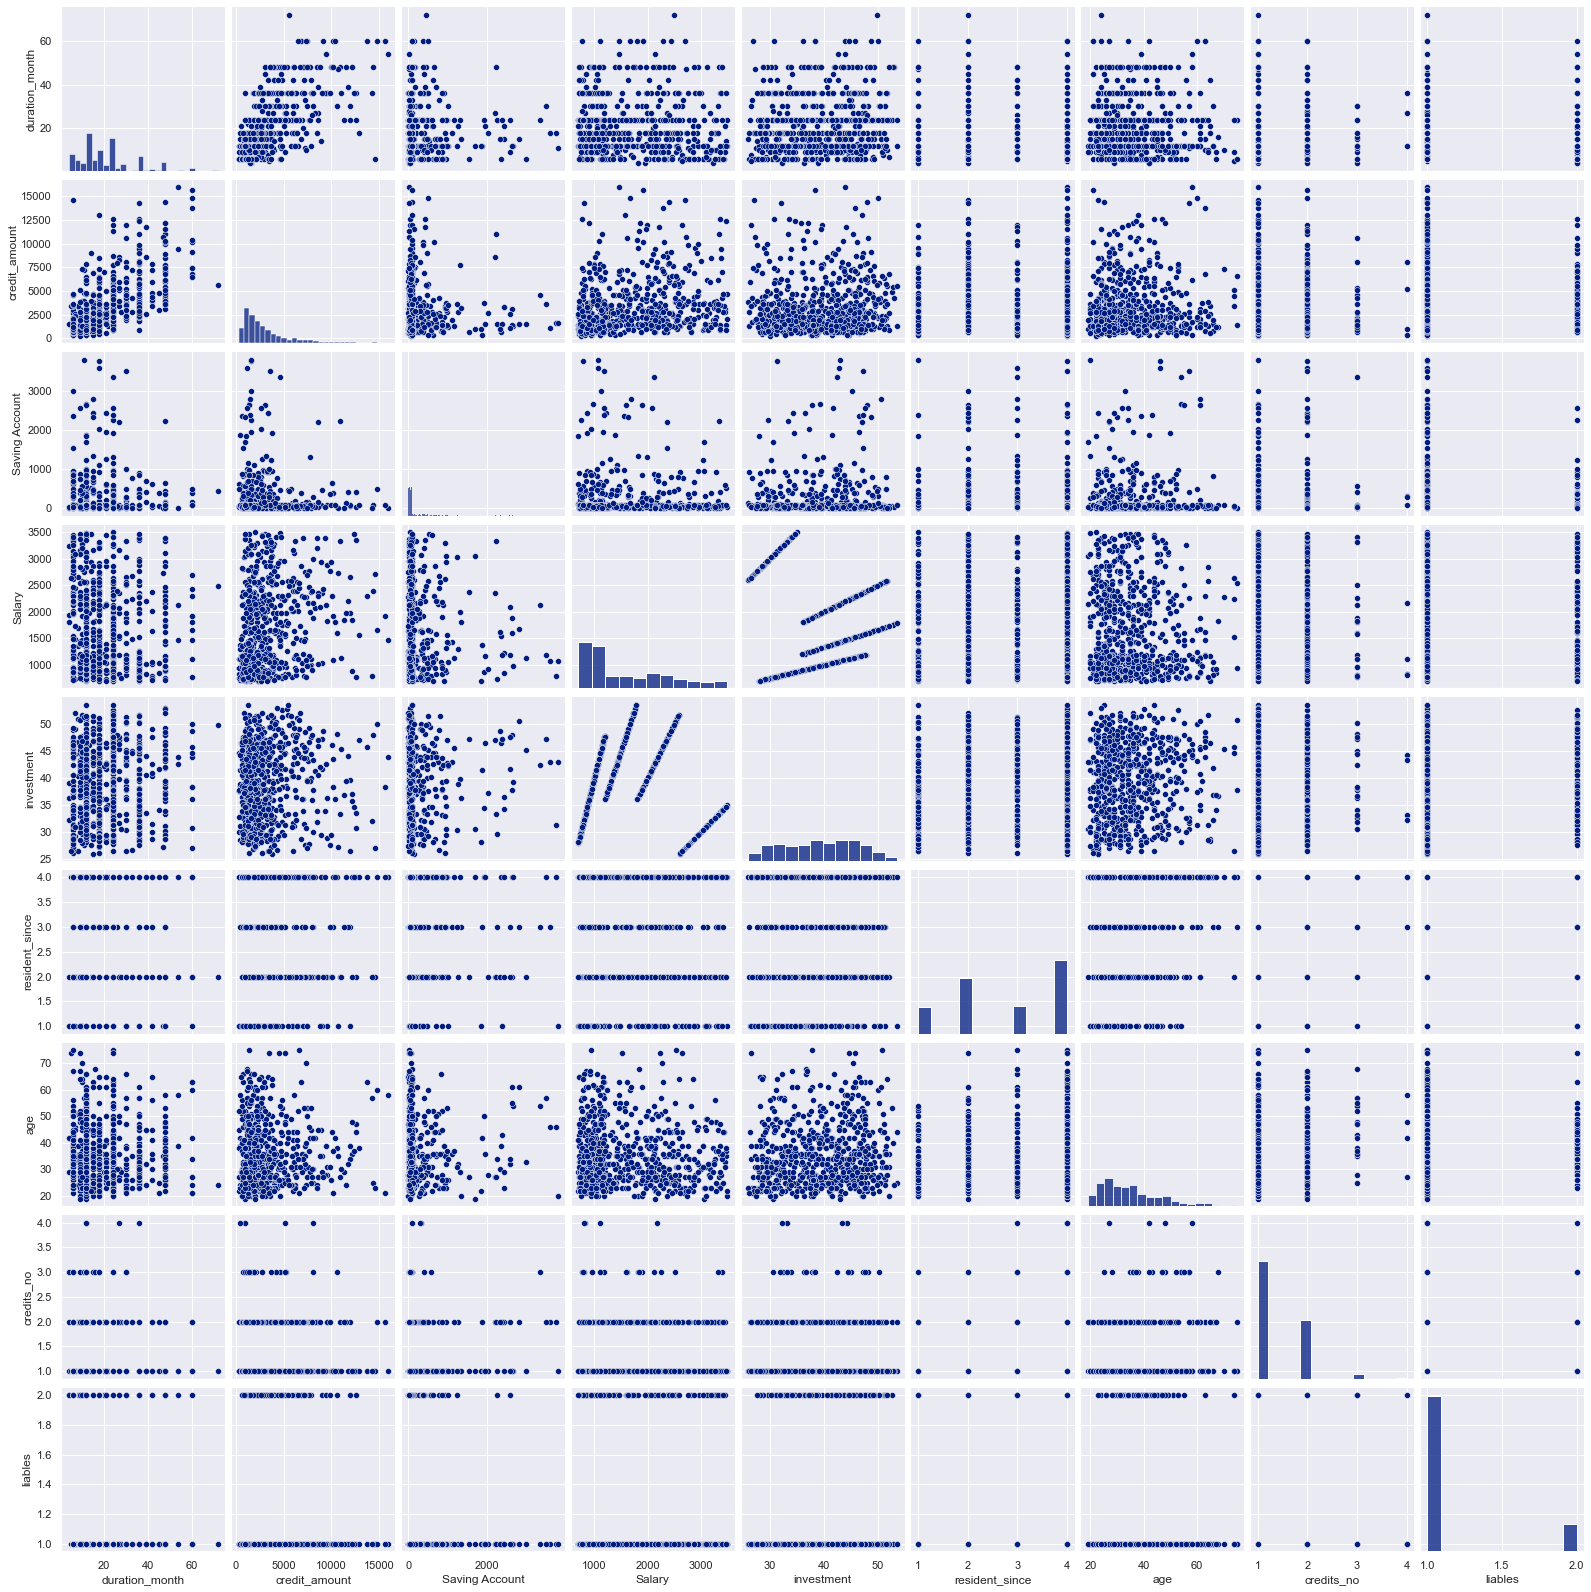

In [7]:
# to check which numerical features have linear relationship with our targrt variable i.e. credit_amount
sns.pairplot(num_data)  

**From above pairplot we can observe that credit_amount do have a some kind of relationship with**
1. Salary
2. Investment
3. saving account (also have missing values to treat)
4. duration_month

Now we will look at the correlation metrics to see which numerical feature affects our target variable.

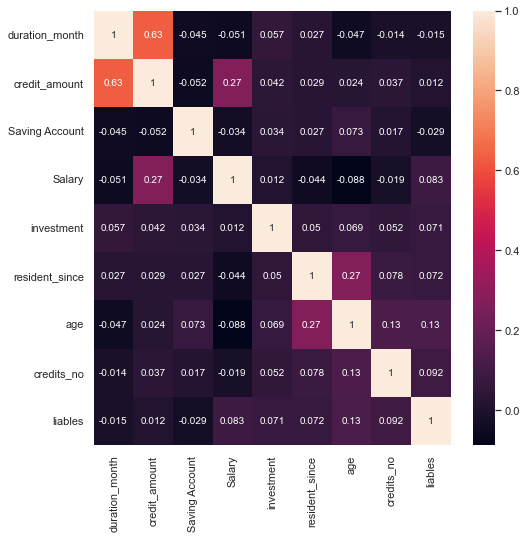

In [8]:
corr = num_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True)
plt.show()

As we have concluded above that duration_month, saving amount, salary and investment have some relationship with credit_amount and from correlation we get a clear idea of how they are related we can observe that investment have very small affect where as duration_month and salary have very strong effect on credit_amount and on the other hand saving Account have negative impact on our target variable.

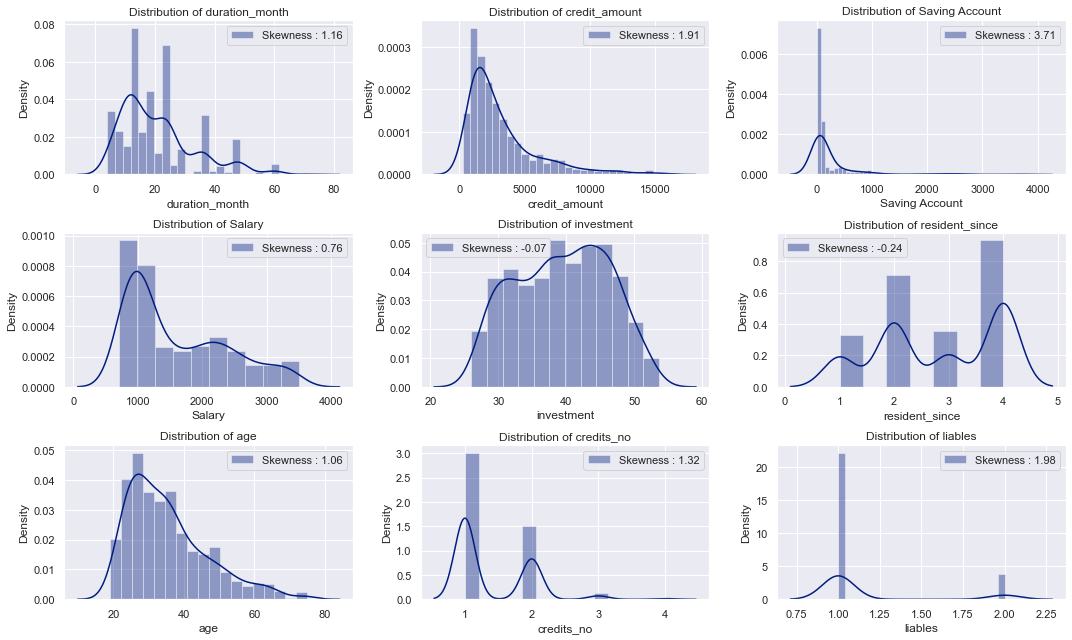

In [9]:
plt.figure(figsize=(15,9))
c=1
for i in num_data.columns:
    plt.subplot(3,3,c)
    plt.title(f'Distribution of {i}')
    s=num_data[i].skew()
    t=sns.distplot(num_data[i],label="Skewness : %.2f"%(s))
    t.legend()
    c=c+1
    plt.tight_layout()
plt.show()

1. From the above Distribution plot we can clearly see that our target data credit_amount is highly skewed and almost all other correlated features as well.
2. Since we have seen the distribution of our data now it's time to check are there any outliers but it is obvious from the above plot we will definitely gonna get outliers for various features so let's check them out with the help of box plots.

## Visualizing outliers with box-plot

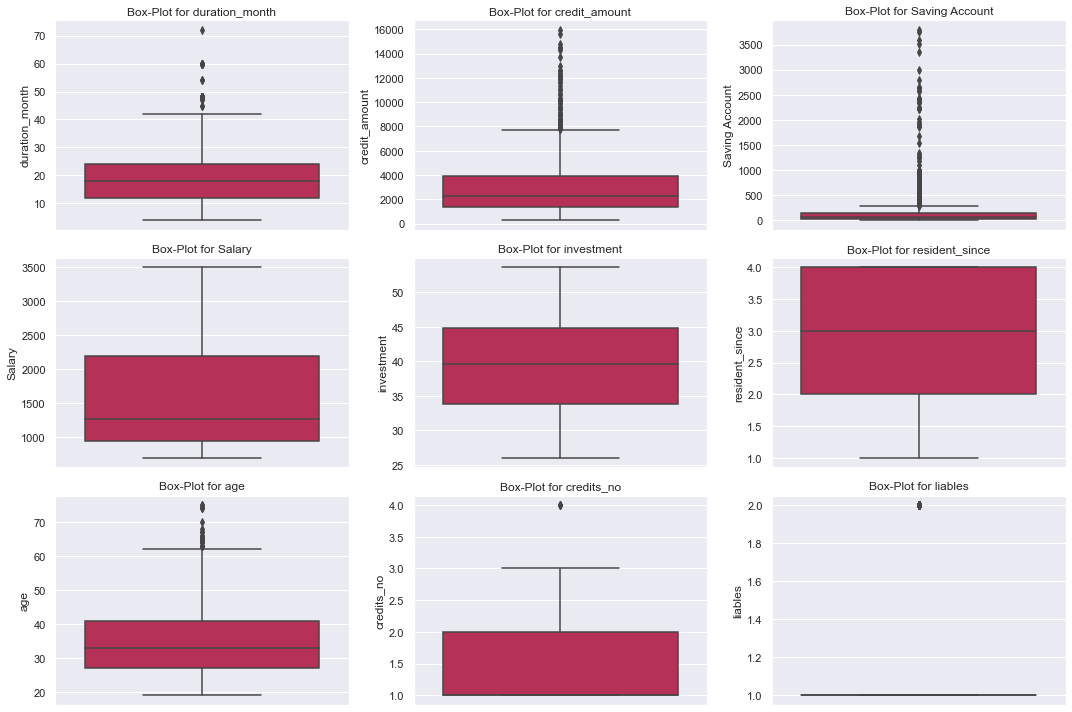

In [10]:
plt.figure(figsize=(15,10))
c=1
for i in num_data.columns:
    plt.subplot(3,3,c)
    plt.title(f"Box-Plot for {i}")
    sns.boxplot(y=num_data[i],palette='rocket')
    c=c+1
    plt.tight_layout()
plt.show()

**Following is a combine plot of previous plots**

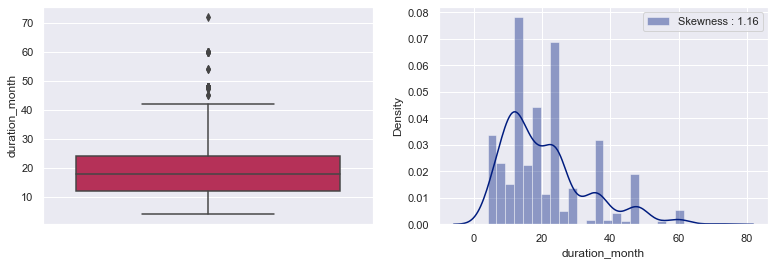

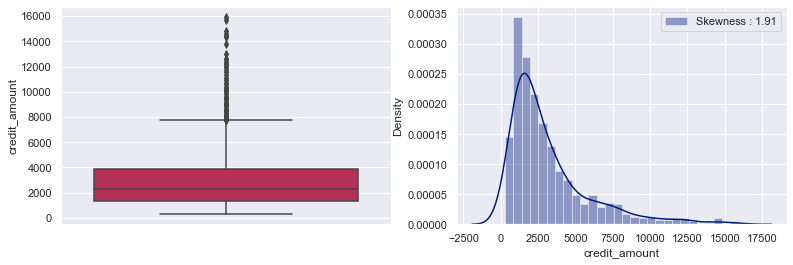

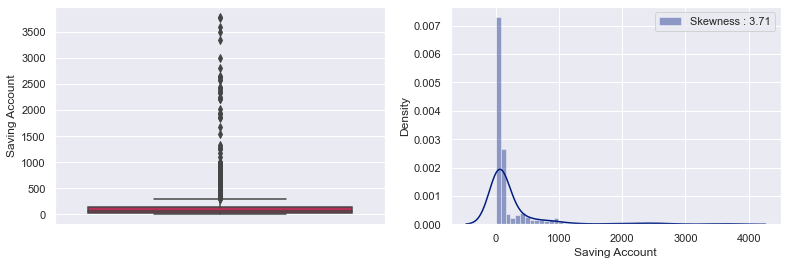

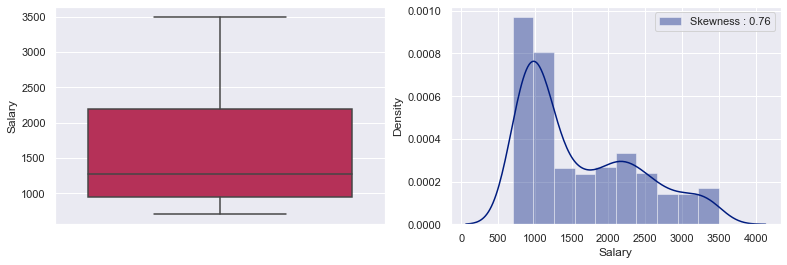

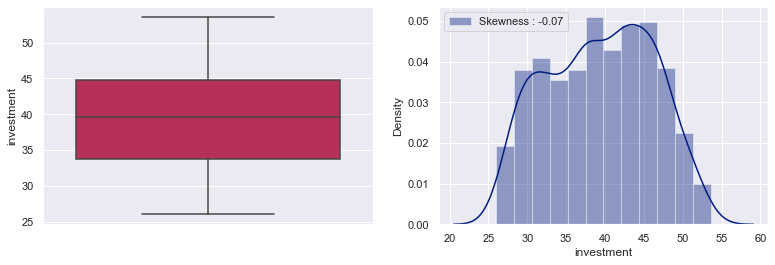

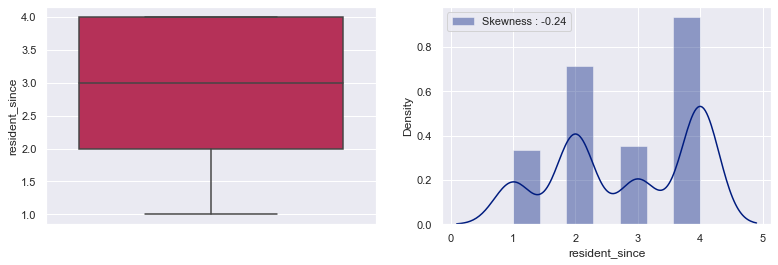

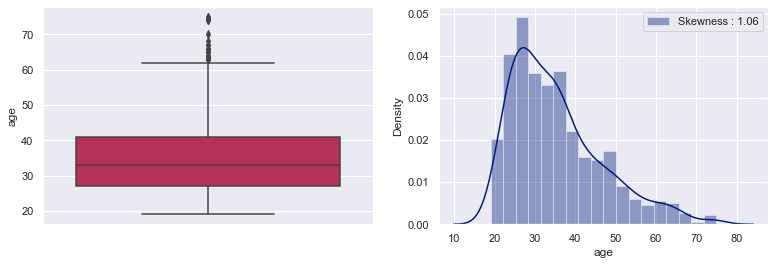

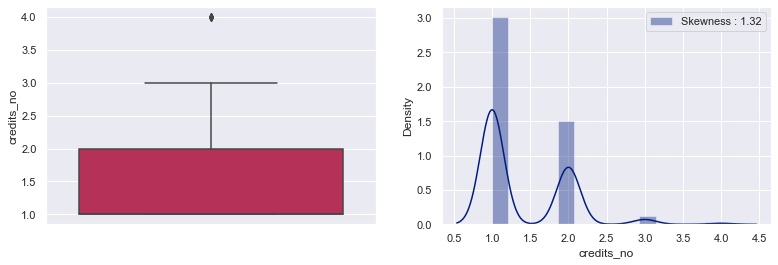

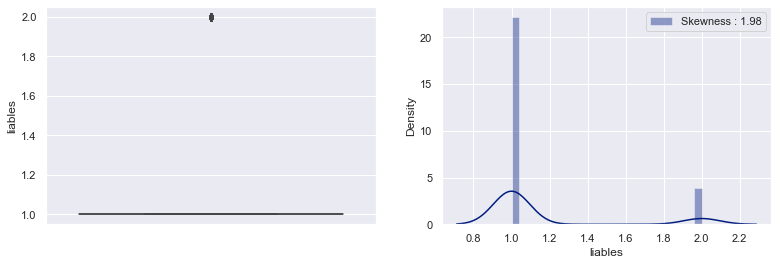

In [11]:
for i in num_data.columns:
    fig,axis=plt.subplots(ncols=2,figsize=(13,4))
    sns.boxplot(y=num_data[i],palette='rocket',ax=axis[0])
    s=num_data[i].skew()
    t=sns.distplot(num_data[i],label="Skewness : %.2f"%(s),ax=axis[1])
    t.legend()
plt.show()

# Categorical Data Analysis

In [12]:
cat_data = df.select_dtypes(include='object')
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 1 to 700
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   account_info      427 non-null    object
 1   Loan              700 non-null    object
 2   Regularity        700 non-null    object
 3   Purpose           700 non-null    object
 4   savings_account   700 non-null    object
 5   employment_st     700 non-null    object
 6   Gender            700 non-null    object
 7   Status            700 non-null    object
 8   gurantors         700 non-null    object
 9   property_type     700 non-null    object
 10  installment_type  700 non-null    object
 11  housing_type      700 non-null    object
 12  job_type          700 non-null    object
 13  telephone         700 non-null    object
 14  foreigner         700 non-null    object
dtypes: object(15)
memory usage: 103.7+ KB


1. we known that categorical data do have lots of missing value 
2. By doing categorical data analysis we may get an idea about how to treat this mising values.

In [13]:
temp =[]
for i in cat_data.columns:
    x=len(cat_data[i].unique())
    temp.append(x)

## Unique Categorical values

In [14]:
unique = pd.DataFrame()
unique['cat_col'] = cat_data.columns
unique['unique_categ'] = temp
unique

,cat_col,unique_categ
0,account_info,4
1,Loan,2
2,Regularity,2
3,Purpose,5
4,savings_account,5
5,employment_st,5
6,Gender,2
7,Status,3
8,gurantors,3
9,property_type,4


In [15]:
unique.describe()

,unique_categ
count,15.000000
mean,3.266667
std,1.162919
min,2.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In certain characteristics, we can see that there are a maximum of five categories.

## Count Plots

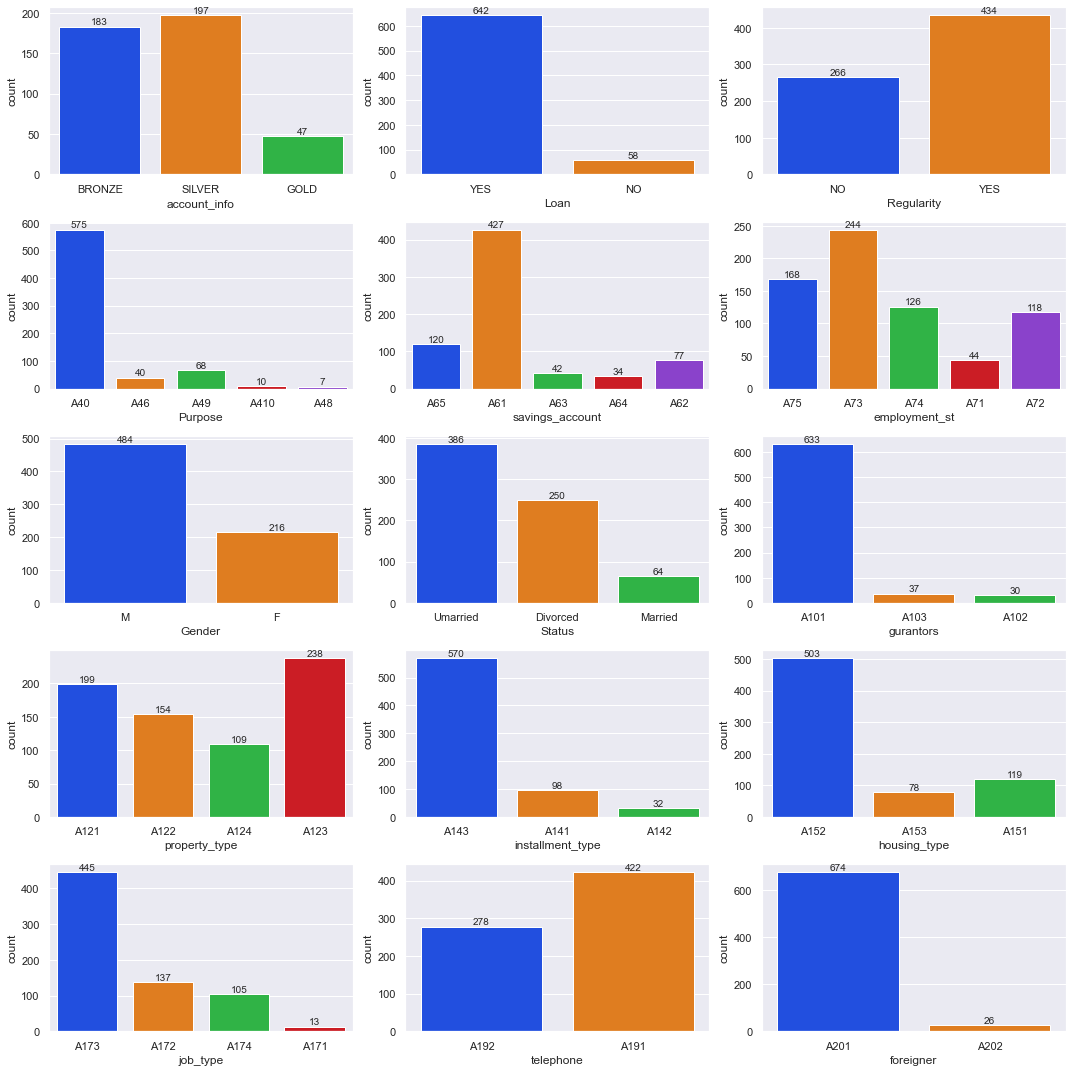

In [16]:
plt.figure(figsize=(15,15))
c=1
for i in cat_data.columns:
    plt.subplot(5,3,c)
    x=sns.countplot(cat_data[i],palette='bright')
    x.bar_label(x.containers[0])
    plt.tight_layout()
    c=c+1
plt.show()

1. We can clearly see from count plot that there are some categories from categorical features who dominates the oter categories. i.e. there are few categorical features which are imbalence and which is possible in our case.

# Numerical and Categorical Data Analysis together
## Bivariate

**We know that there are two columns who have the missing values**
1. **account_info (Categorical)**
2. **Saving Account (Numerical) : We also know from correlation heatmap that Saving Account have the minute inverse relationship with credit amount**

### To see the relation ship and also analyse the outliers in the numerical data w.r.t. categorical features we will be using interact function  to make our work easy.
### If you wanto look how thhis interact function will work you might need to run this jupyter notebook once.

In [17]:
def num_vs_cat(col):
    plt.figure(figsize=(13,10))
    c=1
    for i in num_data.columns:
        plt.subplot(3,3,c)
        plt.title(f'{i} VS {col}')
        sns.boxplot(y=df[i],x=df[col])
        plt.tight_layout()
        c=c+1
    plt.show()
interact(num_vs_cat,col=cat_data.columns)

interactive(children=(Dropdown(description='col', options=('account_info', 'Loan', 'Regularity', 'Purpose', 's…

<function __main__.num_vs_cat(col)>

1. I now have a good understanding of how to handle categorical attributes thanks to the previous examination of numerical vs. categorical data.

2. Given that the order of the majority of the categorical attributes makes sense with our target variable (credit amount), they should either merge or need to be ordinarily encoded.

4. With regard to the missing value feature we have in our category feature, it will be safe to delete that feature from our study because it includes more than 30% of missing data.

3. We'll examine how each categorical attribute relates with credit amount (the target variable).

In [18]:
def cate_exlpor(col):
    plt.title(f'{i} VS {col}')
    sns.boxplot(y=df['credit_amount'],x=df[col])
    plt.tight_layout()
    plt.show()

### Credit amount
### First to be clear Having higher credit amount is good or bad ?
### answer is Yes it is GOOD
#### Why? --> In a real life situation higher credit limit is directly related to better credit score another advantage is the feel good factor

## 1. Purpose: This variable signifies why the loan was taken
1. A40 signifies that the loan is taken to buy a new car
2. A46 signifies that the loan is taken for education
3. A47 signifies that the loan is taken for vacation
4. A48 signifies that the loan is taken for re skilling
5. A49 signifies that the loan is taken for business and establishment
6. A410 signifies other purposes

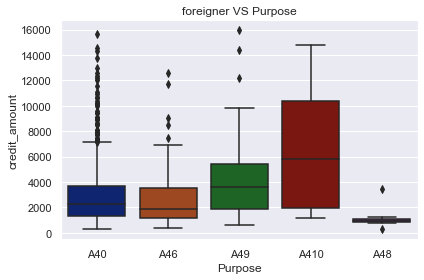

In [19]:
cate_exlpor('Purpose')

1. As we can see, A410 and A40 have a higher proportion of individuals having credit amounts more than 6,000. In addition, if we look closely, we can combine them.
2. We may also prioritise those who come under the A40 and A410 categories above others because we can observe that they have high credit amounts.

In [20]:
cat_data['Purpose'] = np.where(cat_data['Purpose'] == 'A410','A40',cat_data['Purpose'])
cat_data['Purpose'].unique()

array(['A40', 'A46', 'A49', 'A48'], dtype=object)

<AxesSubplot:xlabel='Purpose', ylabel='credit_amount'>

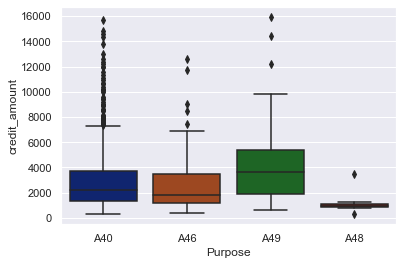

In [21]:
sns.boxplot(y=df['credit_amount'],x=cat_data['Purpose'])

In [22]:
cat_data = cat_data.reset_index()
cat_data.head()

,serial number,account_info,Loan,Regularity,Purpose,savings_account,employment_st,Gender,Status,gurantors,property_type,installment_type,housing_type,job_type,telephone,foreigner
0,1,BRONZE,YES,NO,A40,A65,A75,M,Umarried,A101,A121,A143,A152,A173,A192,A201
1,2,SILVER,YES,YES,A40,A61,A73,F,Divorced,A101,A121,A143,A152,A173,A191,A201
2,3,NaN,YES,NO,A46,A61,A74,M,Umarried,A101,A121,A143,A152,A172,A191,A201
3,4,BRONZE,YES,YES,A40,A61,A74,M,Umarried,A103,A122,A143,A153,A173,A191,A201
4,5,BRONZE,YES,NO,A40,A61,A73,M,Umarried,A101,A124,A143,A153,A173,A191,A201


In [23]:
purpose = []
for i in cat_data['Purpose']:
    if i == 'A48':
        purpose.append(0)
    elif i == 'A46':
        purpose.append(1)
    elif i == 'A49':
        purpose.append(2)
    else:
        purpose.append(3)
cat_data['Purpose'] = purpose
print(f"Unique Values in Purpose column : {cat_data['Purpose'].unique()}")

Unique Values in Purpose column : [3 1 2 0]


## 2. savings_account: This variable signifies details of the amount present in savings account of the individual:
1. A61 signifies that less than 100 units (excluding 100) of currency is present
2. A62 signifies that greater than 100 units (including 100) and less than 500 (excluding 500) units of currency is present
3. A63 signifies that greater than 500 (including 500) and less than 1000 (excluding 1000) units of currency is present.
4. A64 signifies that greater than 1000 (including 1000) units of currency is present.
5. A65 signifies that no savings account details is present on record

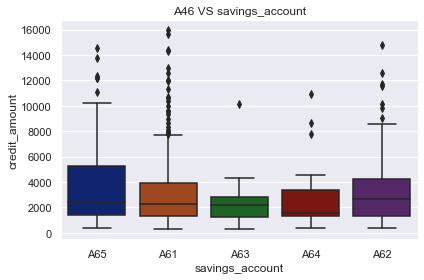

In [24]:
cate_exlpor('savings_account')

1. We can see that the savings_account feature allows us to combine A63 and A64.
2. Comparable to how their data spread and outlier amount are quite similar, the medians of the A62 and A64 are also highly similar so we can combine them as well.
3. There is no need to order them because it will not make sence so we will make them as dummy variables latter.

In [25]:
cat_data['savings_account'] = np.where(cat_data['savings_account'] == 'A63','A64',cat_data['savings_account'])
cat_data['savings_account'].unique()

array(['A65', 'A61', 'A64', 'A62'], dtype=object)

<AxesSubplot:xlabel='savings_account', ylabel='credit_amount'>

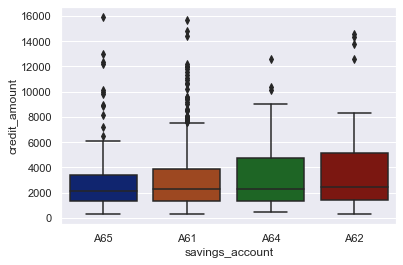

In [26]:
sns.boxplot(y=df['credit_amount'],x=cat_data['savings_account'])

In [27]:
cat_data['savings_account'] = np.where(cat_data['savings_account'] == 'A64','A62',cat_data['savings_account'])
cat_data['savings_account'].unique()

array(['A65', 'A61', 'A62'], dtype=object)

## 3. employment_st: Catergorical variable that signifies the employment status of everyone who has been alloted loans
1. A71 signifies that the individual is unemployed
2. A72 signifies that the individual has been employed for less than a year
3. A73 signifies that the individual has been employed for more than a year but less than four years
4. A74 signifies that the individual has been employed more than four years but less than seven years
5. A75 signifies that the individual has been employed for more than seven years

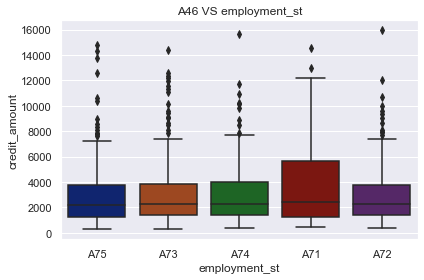

In [28]:
cate_exlpor('employment_st')

1. It is clear that employment st feature A72, A73, A74, and A75 have almost identical numbers of outliers and that their data distributions are comparable to one another.
2. We shall accordingly merge these categories.

In [29]:
cat_data['employment_st'] = np.where(cat_data['employment_st'] == 'A75','A72',cat_data['employment_st'])
cat_data['employment_st'] = np.where(cat_data['employment_st'] == 'A73','A72',cat_data['employment_st'])
cat_data['employment_st'] = np.where(cat_data['employment_st'] == 'A74','A72',cat_data['employment_st'])
cat_data['employment_st'].unique()

array(['A72', 'A71'], dtype=object)

<AxesSubplot:xlabel='employment_st', ylabel='credit_amount'>

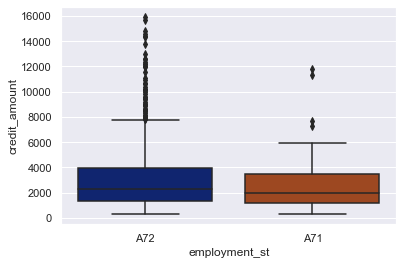

In [30]:
sns.boxplot(y=df['credit_amount'],x=cat_data['employment_st'])

## 3. gurantors: Categorical variable which signifies if any other individual is involved with an individual loan case
1. A101 signifies that only a single individual is involved in the loan application
2. A102 signifies that one or more co-applicant is present in the loan application
3. A103 signifies that guarantor are present.

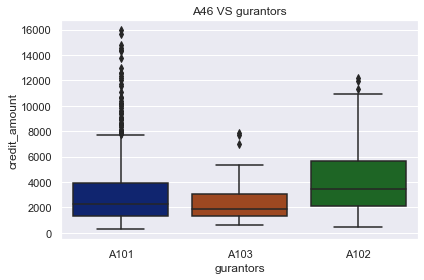

In [31]:
cate_exlpor('gurantors')

1. We will ordinally encode the data since we can see that if a single individual is involved in a loan application, i.e., A101, they are getting a high credit amount.

In [32]:
gurantors = []
for i in cat_data['gurantors']:
    if i == 'A103':
        gurantors.append(0)
    elif i == 'A102':
        gurantors.append(1)
    else:
        gurantors.append(2)
cat_data['gurantors'] = gurantors
print(f"Unique Values in gurantors column : {cat_data['gurantors'].unique()}")

Unique Values in gurantors column : [2 0 1]


## 4. installment_type: This variable signifies other installment types taken
1. A141 signifies installment to bank
2. A142 signifies installment to outlets or stores
3. A143 signifies that no information is present


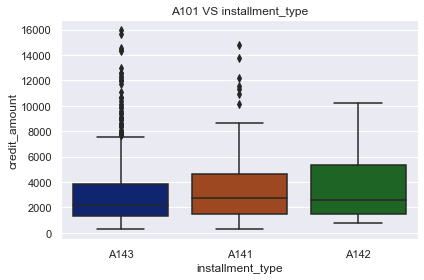

In [33]:
cate_exlpor('installment_type')

<AxesSubplot:xlabel='installment_type', ylabel='credit_amount'>

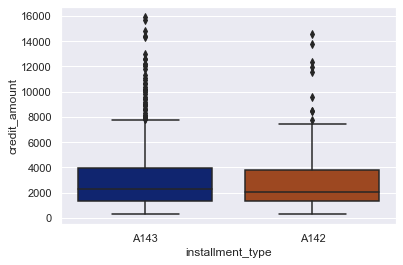

In [34]:
cat_data['installment_type'] = np.where(cat_data['installment_type'] == 'A141','A142',cat_data['installment_type'])
cat_data['installment_type'].unique()
sns.boxplot(y=df['credit_amount'],x=cat_data['installment_type'])

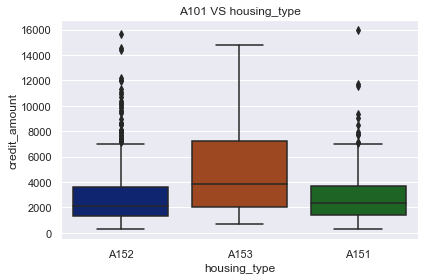

In [35]:
cate_exlpor('housing_type')

<AxesSubplot:xlabel='housing_type', ylabel='credit_amount'>

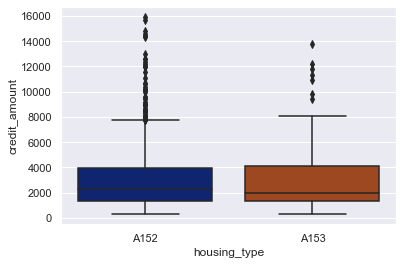

In [36]:
cat_data['housing_type'] = np.where(cat_data['housing_type'] == 'A151','A152',cat_data['housing_type'])
cat_data['housing_type'].unique()
sns.boxplot(y=df['credit_amount'],x=cat_data['housing_type'])

## job_type: Signifies the employment status of the person
1. A171 signifies that the individual is unemployed or unskilled and is a non-resident
2. A172 signifies that the individual is unskilled but is a resident
3. A173 signifies that the individual is a skilled employee or official
4. A174 signifies that the individual is involved in management or is self-employed or a highly qualified employee or officer

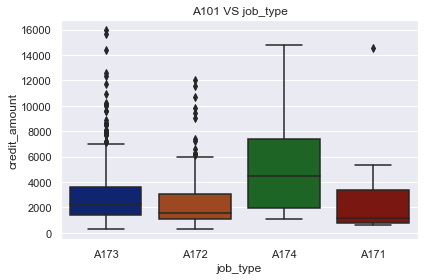

In [37]:
cate_exlpor('job_type')

1. Here we can see job_type can be ordinally encoded as well as we can combine some categories.
2. We will combine A172, A174 and A173, and in ordinary coding we will give low priority to the A171.

<AxesSubplot:xlabel='job_type', ylabel='credit_amount'>

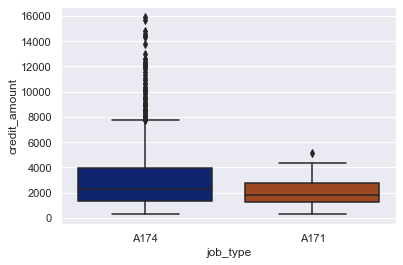

In [38]:
cat_data['job_type'] = np.where(cat_data['job_type'] == 'A173','A172',cat_data['job_type'])
cat_data['job_type'] = np.where(cat_data['job_type'] == 'A172','A174',cat_data['job_type'])
cat_data['job_type'].unique()
sns.boxplot(y=df['credit_amount'],x=cat_data['job_type'])

In [39]:
job_type = []
for i in cat_data['job_type']:
    if i == 'A174':
        job_type.append(1)
    else:
        job_type.append(0)
cat_data['job_type'] = job_type
print(f"Unique Values in job_type column : {cat_data['job_type'].unique()}")

Unique Values in job_type column : [1 0]


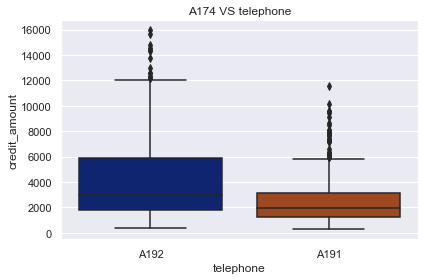

In [40]:
cate_exlpor('telephone')

In [41]:
# ecoding
telephone = []
for i in cat_data['telephone']:
    if i == 'A192':
        telephone.append(1)
    else:
        telephone.append(0)
cat_data['telephone'] = telephone
print(f"Unique Values in telephone column : {cat_data['telephone'].unique()}")

Unique Values in telephone column : [1 0]


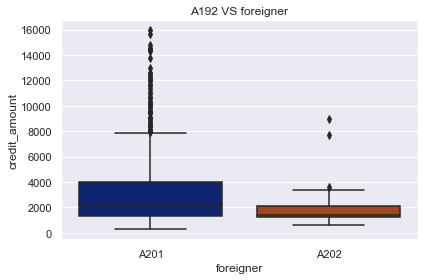

In [42]:
cate_exlpor('foreigner')

In [43]:
# encoding foreigner feature 
foreigner = []
for i in cat_data['foreigner']:
    if i == 'A201':
        foreigner.append(1)
    else:
        foreigner.append(0)
cat_data['foreigner'] = foreigner
print(f"Unique Values in foreigner column : {cat_data['foreigner'].unique()}")

Unique Values in foreigner column : [1 0]


In [44]:
cat_data.drop('account_info',axis=1,inplace=True)

## Combining Preprocessing step:

**The following step is a combined process of encoding, combing categorical features and dropping unwanted features. After this step, we will be moving forward to scalling our data and getting dummy features so that we can make our data ready to be fed into the model.**

In [45]:
def categorical_data_preprocessing_encoding(cat_data):
    cat_data = cat_data.drop('account_info',axis=1)
    cat_data['Purpose'] = np.where(cat_data['Purpose'] == 'A410','A40',cat_data['Purpose'])
    cat_data['savings_account'] = np.where(cat_data['savings_account'] == 'A63','A64',cat_data['savings_account'])
    cat_data['savings_account'] = np.where(cat_data['savings_account'] == 'A64','A62',cat_data['savings_account'])
    cat_data['employment_st'] = np.where(cat_data['employment_st'] == 'A75','A72',cat_data['employment_st'])
    cat_data['employment_st'] = np.where(cat_data['employment_st'] == 'A73','A72',cat_data['employment_st'])
    cat_data['employment_st'] = np.where(cat_data['employment_st'] == 'A74','A72',cat_data['employment_st'])
    cat_data['installment_type'] = np.where(cat_data['installment_type'] == 'A141','A142',cat_data['installment_type'])
    cat_data['housing_type'] = np.where(cat_data['housing_type'] == 'A151','A152',cat_data['housing_type'])
    cat_data['job_type'] = np.where(cat_data['job_type'] == 'A173','A172',cat_data['job_type'])
    cat_data['job_type'] = np.where(cat_data['job_type'] == 'A172','A174',cat_data['job_type'])
    foreigner = []
    for i in cat_data['foreigner']:
        if i == 'A201':
            foreigner.append(1)
        else:
            foreigner.append(0)
    cat_data['foreigner'] = foreigner
    telephone = []
    for i in cat_data['telephone']:
        if i == 'A192':
            telephone.append(1)
        else:
            telephone.append(0)
    cat_data['telephone'] = telephone

    job_type = []
    for i in cat_data['job_type']:
        if i == 'A174':
            job_type.append(1)
        else:
            job_type.append(0)
    cat_data['job_type'] = job_type

    gurantors = []
    for i in cat_data['gurantors']:
        if i == 'A103':
            gurantors.append(0)
        elif i == 'A102':
            gurantors.append(1)
        else:
            gurantors.append(2)
    cat_data['gurantors'] = gurantors

    purpose = []
    for i in cat_data['Purpose']:
        if i == 'A48':
            purpose.append(0)
        elif i == 'A46':
            purpose.append(1)
        elif i == 'A49':
            purpose.append(2)
        else:
            purpose.append(3)
    cat_data['Purpose'] = purpose
    cat_data = cat_data.drop(['serial number','Saving Account'],axis=1)
    cat_data['liables'] = cat_data['liables'].astype('object')
    return cat_data

In [150]:
data = pd.read_csv('train.csv')

In [151]:
data = categorical_data_preprocessing_encoding(data)

In [152]:
data.head()

,duration_month,Loan,Regularity,Purpose,credit_amount,savings_account,employment_st,Salary,investment,Gender,Status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,6,YES,NO,3,1169,A65,A72,852,34.08,M,Umarried,2,4,A121,67,A143,A152,2,1,1,1,1
1,48,YES,YES,3,5951,A61,A72,2400,48.00,F,Divorced,2,2,A121,22,A143,A152,1,1,1,0,1
2,12,YES,NO,1,2096,A61,A72,2078,41.56,M,Umarried,2,3,A121,49,A143,A152,1,1,2,0,1
3,42,YES,YES,3,7882,A61,A72,2380,47.60,M,Umarried,0,4,A122,45,A143,A153,1,1,2,0,1
4,24,YES,NO,3,4870,A61,A72,1756,52.68,M,Umarried,2,4,A124,53,A143,A153,2,1,2,0,1


In [153]:
x = data.drop('credit_amount',axis=1)
y = data['credit_amount']

In [154]:
x = pd.get_dummies(x,drop_first=True)
x.head()

,duration_month,Purpose,Salary,investment,gurantors,resident_since,age,credits_no,job_type,telephone,foreigner,Loan_YES,Regularity_YES,savings_account_A62,savings_account_A65,employment_st_A72,Gender_M,Status_Married,Status_Umarried,property_type_A122,property_type_A123,property_type_A124,installment_type_A143,housing_type_A153,liables_2
0,6,3,852,34.08,2,4,67,2,1,1,1,1,0,0,1,1,1,0,1,0,0,0,1,0,0
1,48,3,2400,48.00,2,2,22,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0
2,12,1,2078,41.56,2,3,49,1,1,0,1,1,0,0,0,1,1,0,1,0,0,0,1,0,1
3,42,3,2380,47.60,0,4,45,1,1,0,1,1,1,0,0,1,1,0,1,1,0,0,1,1,1
4,24,3,1756,52.68,2,4,53,2,1,0,1,1,0,0,0,1,1,0,1,0,0,1,1,1,1


In [155]:
x.shape

(700, 25)

In [190]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error,r2_score

In [157]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [158]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.1,random_state=47)

# Baseline Model

In [159]:
rf_model = RandomForestRegressor(n_estimators=100,random_state=47)
rf_model.fit(train_x,train_y)
train_pred = rf_model.predict(train_x)
test_pred = rf_model.predict(test_x)

<AxesSubplot:xlabel='credit_amount'>

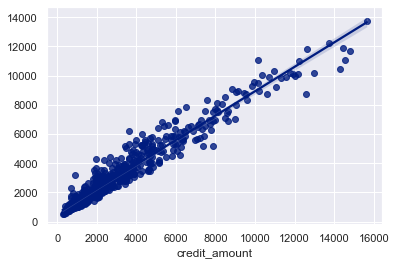

In [160]:
sns.regplot(train_y,train_pred)

<AxesSubplot:xlabel='credit_amount'>

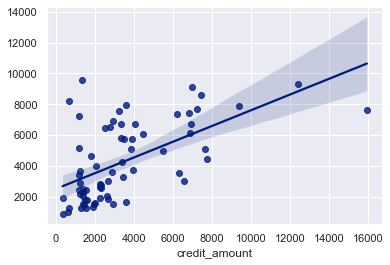

In [161]:
sns.regplot(test_y,test_pred)

In [162]:
rf_rmse_test = np.sqrt(mean_squared_error(test_y,test_pred))

In [163]:
rf_rmse_test

2590.069996049748

In [164]:
rf_rmse_train = np.sqrt(mean_squared_error(train_y,train_pred))

In [165]:
rf_acc_train = (1-(rf_rmse_train/100000))*100
rf_acc_train

99.27884037719949

In [166]:
rf_acc_test = (1-(rf_rmse_test/100000))*100
rf_acc_test

97.40993000395025

In [167]:
train_x.shape

(630, 25)

In [168]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV

In [169]:
model = rf_model
model.fit(train_x,train_y)
train_pred = model.predict(train_x)
test_pred = model.predict(test_x)
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='neg_mean_squared_error')
rfecv = rfecv.fit(train_x, train_y)
X_train_rfecv = rfecv.transform(train_x)
model.fit(X_train_rfecv,train_y)
X_test_rfecv = rfecv.transform(test_x)
y_pred_rfecv = model.predict(X_test_rfecv)

<AxesSubplot:ylabel='credit_amount'>

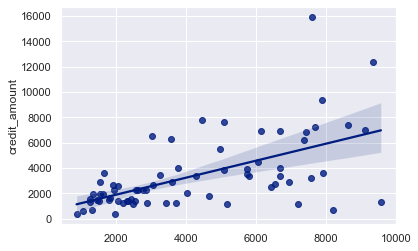

In [170]:
sns.regplot(y_pred_rfecv,test_y)

In [171]:
import optuna

In [173]:

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators',10,200)
    criterion = trial.suggest_categorical('criterion',['squared_error', 'absolute_error', 'poisson'])
    max_depth = trial.suggest_int('max_depth',1,6)
    #min_samples_leaf = trial.suggest_categorical('min_samples_leaf',[int,1])
    max_features = trial.suggest_categorical('max_features',['sqrt', 'log2', 'auto'])
    random_state = trial.suggest_int('random_state',1,30)
    model = RandomForestRegressor(n_estimators=n_estimators,criterion=criterion,max_depth=max_depth,max_features=max_features,
                                 random_state=random_state)
    cv_score = np.mean(cross_val_score(model,X_train_rfecv,train_y,scoring = 'neg_mean_squared_error',cv=5))
    return cv_score
# 3. Create a study object and optimize the objective function.
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)


[I 2022-10-16 20:50:42,174] A new study created in memory with name: no-name-6fb1a7fc-e29f-4fd1-9902-e7047bfd28e7
[I 2022-10-16 20:50:43,609] Trial 0 finished with value: 0.4655892118519137 and parameters: {'n_estimators': 158, 'criterion': 'squared_error', 'max_depth': 6, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.4655892118519137.
[I 2022-10-16 20:50:44,148] Trial 1 finished with value: 0.2280756092641642 and parameters: {'n_estimators': 58, 'criterion': 'poisson', 'max_depth': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.4655892118519137.
[I 2022-10-16 20:50:45,696] Trial 2 finished with value: 0.19512247827944773 and parameters: {'n_estimators': 191, 'criterion': 'poisson', 'max_depth': 4, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.4655892118519137.
[I 2022-10-16 20:50:46,955] Trial 3 finished with value: 0.27503299698685335 and parameters: {'n_estimators': 173, 'criterion': 'squared_error', 'max_depth': 2, 'max_features': 'log2'}. Best is trial

[I 2022-10-16 20:53:28,015] Trial 33 finished with value: 0.49665230963673956 and parameters: {'n_estimators': 184, 'criterion': 'absolute_error', 'max_depth': 5, 'max_features': 'auto'}. Best is trial 33 with value: 0.49665230963673956.
[I 2022-10-16 20:53:30,492] Trial 34 finished with value: 0.27977413429104975 and parameters: {'n_estimators': 186, 'criterion': 'poisson', 'max_depth': 6, 'max_features': 'auto'}. Best is trial 33 with value: 0.49665230963673956.
[I 2022-10-16 20:53:32,621] Trial 35 finished with value: 0.41405739926202506 and parameters: {'n_estimators': 92, 'criterion': 'absolute_error', 'max_depth': 5, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.49665230963673956.
[I 2022-10-16 20:53:37,088] Trial 36 finished with value: 0.4866492150083331 and parameters: {'n_estimators': 59, 'criterion': 'absolute_error', 'max_depth': 6, 'max_features': 'auto'}. Best is trial 33 with value: 0.49665230963673956.
[I 2022-10-16 20:53:38,386] Trial 37 finished with value: 

[I 2022-10-16 20:57:05,046] Trial 66 finished with value: 0.4957545165234385 and parameters: {'n_estimators': 191, 'criterion': 'absolute_error', 'max_depth': 5, 'max_features': 'auto'}. Best is trial 33 with value: 0.49665230963673956.
[I 2022-10-16 20:57:09,698] Trial 67 finished with value: 0.4491856386459926 and parameters: {'n_estimators': 192, 'criterion': 'absolute_error', 'max_depth': 6, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.49665230963673956.
[I 2022-10-16 20:57:10,515] Trial 68 finished with value: 0.2611212708703309 and parameters: {'n_estimators': 64, 'criterion': 'poisson', 'max_depth': 5, 'max_features': 'auto'}. Best is trial 33 with value: 0.49665230963673956.
[I 2022-10-16 20:57:12,947] Trial 69 finished with value: 0.4752211412163139 and parameters: {'n_estimators': 30, 'criterion': 'absolute_error', 'max_depth': 6, 'max_features': 'auto'}. Best is trial 33 with value: 0.49665230963673956.
[I 2022-10-16 20:57:16,172] Trial 70 finished with value: 0.3

[I 2022-10-16 21:02:10,686] Trial 99 finished with value: 0.4905730296039062 and parameters: {'n_estimators': 174, 'criterion': 'absolute_error', 'max_depth': 6, 'max_features': 'auto'}. Best is trial 33 with value: 0.49665230963673956.


In [174]:
print('best parameters : ',study.best_params)
#best parameters :  {'n_estimators': 82, 'criterion': 'absolute_error', 'max_depth': 6}
#best parameters :  {'n_estimators': 151, 'criterion': 'absolute_error', 'max_depth': 6, 'max_features': None, 'random_state': 17}
#best parameters :  {'n_estimators': 168, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': 'auto', 'random_state': 21}

best parameters :  {'n_estimators': 184, 'criterion': 'absolute_error', 'max_depth': 5, 'max_features': 'auto'}


In [134]:
model = RandomForestRegressor(n_estimators=181,criterion='absolute_error',max_depth=6,random_state=14,max_features='auto') 
#best parameters :  {'n_estimators': 68, 'criterion': 'absolute_error', 'max_depth': 5}
#{'n_estimators': 92, 'criterion': 'squared_error', 'max_depth': 5}
model.fit(X_train_rfecv,train_y)
tr_praid = model.predict(X_train_rfecv)
tst_pred = model.predict(X_test_rfecv)

In [179]:
len(rfecv.get_feature_names_out())

25

# Tuned RF model

<AxesSubplot:ylabel='credit_amount'>

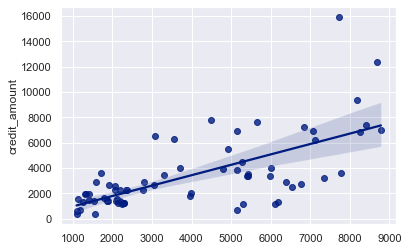

In [136]:
sns.regplot(tst_pred,test_y)

# RMSE For Random Forest Regression

In [138]:
RDF_RMSE = np.sqrt(mean_squared_error(tst_pred,test_y))
score =  (1-(RDF_RMSE/100000))*100
print(score)
print(RDF_RMSE)

97.78577411796121
2214.225882038788


In [182]:
test = pd.read_csv('test.csv')
test_data = categorical_data_preprocessing_encoding(test)

In [184]:

test_data.head()

,duration_month,Loan,Regularity,Purpose,savings_account,employment_st,Salary,investment,Gender,Status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,12,YES,YES,3,A62,A72,1134,45.36,F,Divorced,2,4,A123,29,A143,A152,1,1,1,0,1
1,48,YES,NO,3,A61,A72,783,31.32,M,Umarried,2,4,A124,46,A143,A153,2,1,1,1,1
2,24,YES,YES,3,A62,A72,1181,47.24,F,Divorced,2,2,A124,47,A143,A153,1,1,1,1,1
3,30,YES,NO,2,A62,A72,853,34.12,M,Umarried,2,2,A122,41,A142,A152,2,1,1,0,1
4,27,YES,YES,2,A61,A72,888,35.52,F,Divorced,2,1,A122,32,A143,A152,1,1,2,1,1


In [185]:
test_data = pd.get_dummies(test_data,drop_first=True)
test_data.head()
print(test_data.shape)

(300, 25)


In [186]:
test_data.head()

,duration_month,Purpose,Salary,investment,gurantors,resident_since,age,credits_no,job_type,telephone,foreigner,Loan_YES,Regularity_YES,savings_account_A62,savings_account_A65,employment_st_A72,Gender_M,Status_Married,Status_Umarried,property_type_A122,property_type_A123,property_type_A124,installment_type_A143,housing_type_A153,liables_2
0,12,3,1134,45.36,2,4,29,1,1,0,1,1,1,1,0,1,0,0,0,0,1,0,1,0,0
1,48,3,783,31.32,2,4,46,2,1,1,1,1,0,0,0,1,1,0,1,0,0,1,1,1,0
2,24,3,1181,47.24,2,2,47,1,1,1,1,1,1,1,0,1,0,0,0,0,0,1,1,1,0
3,30,2,853,34.12,2,2,41,2,1,0,1,1,0,1,0,1,1,0,1,1,0,0,0,0,0
4,27,2,888,35.52,2,1,32,1,1,1,1,1,1,0,0,1,0,0,0,1,0,0,1,0,1


In [187]:
#test_data = test_data.drop(['Status_Umarried','Gender_M'],axis=1)

In [188]:

test_data = pd.get_dummies(test_data,drop_first=True)
print(test_data.shape)
serial_number = test['serial number']
x=scaler.fit_transform(test_data)
final_1_pred = model.predict(x)
temp = pd.DataFrame()
temp['s.no'] = serial_number
temp['credit_amount'] = final_1_pred
temp.head()
temp.to_csv('final_6_Chinmay.csv',index=False)

In [106]:
#temp.to_csv('final_1_Chinmay.csv')

# ADA

In [176]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators',10,100)
    learning_rate = trial.suggest_float('learning_rate',1e-5, 1e-1, log=True)
    loss = trial.suggest_categorical('loss',['linear', 'square', 'exponential'])
    random_state= trial.suggest_int('max_depth',1,100)
    model = AdaBoostRegressor(n_estimators=n_estimators,learning_rate=learning_rate,loss=loss,random_state=random_state)
    cv_score = np.mean(cross_val_score(model,X_train_rfecv,train_y,scoring = 'neg_mean_squared_error',cv=5))
    return cv_score
# 3. Create a study object and optimize the objective function.
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2022-10-16 21:03:14,226] A new study created in memory with name: no-name-055fc753-5d52-489b-8863-5a7b7fe3815d
[I 2022-10-16 21:03:14,781] Trial 0 finished with value: -3791214.7712930096 and parameters: {'n_estimators': 41, 'learning_rate': 0.011403220306867922, 'loss': 'linear', 'max_depth': 78}. Best is trial 0 with value: -3791214.7712930096.
[I 2022-10-16 21:03:15,584] Trial 1 finished with value: -3852763.4849008946 and parameters: {'n_estimators': 69, 'learning_rate': 0.00012814372165102076, 'loss': 'exponential', 'max_depth': 69}. Best is trial 0 with value: -3791214.7712930096.
[I 2022-10-16 21:03:16,469] Trial 2 finished with value: -3835183.6309336396 and parameters: {'n_estimators': 78, 'learning_rate': 9.62878424545512e-05, 'loss': 'square', 'max_depth': 39}. Best is trial 0 with value: -3791214.7712930096.
[I 2022-10-16 21:03:17,060] Trial 3 finished with value: -3901197.208636514 and parameters: {'n_estimators': 47, 'learning_rate': 0.00869439213538263, 'loss': 'squar

[I 2022-10-16 21:03:33,930] Trial 32 finished with value: -3792830.772956893 and parameters: {'n_estimators': 79, 'learning_rate': 0.019108875411191224, 'loss': 'exponential', 'max_depth': 66}. Best is trial 30 with value: -3757787.736039105.
[I 2022-10-16 21:03:34,950] Trial 33 finished with value: -3762137.2152748173 and parameters: {'n_estimators': 72, 'learning_rate': 0.09999064178641737, 'loss': 'exponential', 'max_depth': 81}. Best is trial 30 with value: -3757787.736039105.
[I 2022-10-16 21:03:35,812] Trial 34 finished with value: -3790047.151934281 and parameters: {'n_estimators': 74, 'learning_rate': 0.0416304907517439, 'loss': 'exponential', 'max_depth': 53}. Best is trial 30 with value: -3757787.736039105.
[I 2022-10-16 21:03:36,789] Trial 35 finished with value: -3792662.502952081 and parameters: {'n_estimators': 73, 'learning_rate': 0.05250077655990876, 'loss': 'exponential', 'max_depth': 55}. Best is trial 30 with value: -3757787.736039105.
[I 2022-10-16 21:03:38,025] Tri

[I 2022-10-16 21:04:09,373] Trial 64 finished with value: -3820068.1127068372 and parameters: {'n_estimators': 78, 'learning_rate': 0.04159296457612779, 'loss': 'exponential', 'max_depth': 45}. Best is trial 43 with value: -3722726.1084450437.
[I 2022-10-16 21:04:10,813] Trial 65 finished with value: -3845975.266549688 and parameters: {'n_estimators': 97, 'learning_rate': 0.0003390361191725113, 'loss': 'exponential', 'max_depth': 2}. Best is trial 43 with value: -3722726.1084450437.
[I 2022-10-16 21:04:11,938] Trial 66 finished with value: -3804731.007875322 and parameters: {'n_estimators': 92, 'learning_rate': 0.024506380442806872, 'loss': 'exponential', 'max_depth': 20}. Best is trial 43 with value: -3722726.1084450437.
[I 2022-10-16 21:04:12,901] Trial 67 finished with value: -3849684.1507717883 and parameters: {'n_estimators': 86, 'learning_rate': 0.0031913541567825886, 'loss': 'square', 'max_depth': 57}. Best is trial 43 with value: -3722726.1084450437.
[I 2022-10-16 21:04:13,501]

[I 2022-10-16 21:04:38,898] Trial 96 finished with value: -3761048.9916640604 and parameters: {'n_estimators': 53, 'learning_rate': 0.08184779322212407, 'loss': 'exponential', 'max_depth': 63}. Best is trial 43 with value: -3722726.1084450437.
[I 2022-10-16 21:04:39,465] Trial 97 finished with value: -3759794.144909595 and parameters: {'n_estimators': 44, 'learning_rate': 0.05697354764442388, 'loss': 'exponential', 'max_depth': 67}. Best is trial 43 with value: -3722726.1084450437.
[I 2022-10-16 21:04:39,936] Trial 98 finished with value: -3756797.761123954 and parameters: {'n_estimators': 38, 'learning_rate': 0.06298735935096726, 'loss': 'square', 'max_depth': 61}. Best is trial 43 with value: -3722726.1084450437.
[I 2022-10-16 21:04:40,515] Trial 99 finished with value: -3764374.100674982 and parameters: {'n_estimators': 49, 'learning_rate': 0.085618116504689, 'loss': 'exponential', 'max_depth': 51}. Best is trial 43 with value: -3722726.1084450437.


In [177]:
print('best parameters : ',study.best_params)

best parameters :  {'n_estimators': 99, 'learning_rate': 0.06719355313930908, 'loss': 'exponential', 'max_depth': 44}


In [178]:
ada_model = AdaBoostRegressor(n_estimators=99,learning_rate=0.06719355313930908,loss='exponential',random_state=44)
ada_model.fit(X_train_rfecv,train_y)
tr_praid = ada_model.predict(X_train_rfecv)
tst_pred = ada_model.predict(X_test_rfecv)

<AxesSubplot:ylabel='credit_amount'>

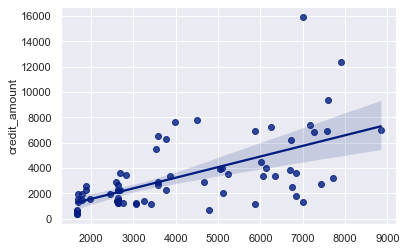

In [180]:
sns.regplot(tst_pred,test_y)

In [181]:
RDF_RMSE = np.sqrt(mean_squared_error(tst_pred,test_y))
score =  (1-(RDF_RMSE/100000))*100
print(score)
print(RDF_RMSE)

97.57674224220388
2423.2577577961147


In [189]:
test = pd.read_csv('test.csv')
test_data = categorical_data_preprocessing_encoding(test)
serial_number = test['serial number']
x=scaler.fit_transform(test_data)
final_1_pred = ada_model.predict(x)
temp = pd.DataFrame()
temp['s.no'] = serial_number
temp['credit_amount'] = final_1_pred
temp.head()
temp.to_csv('final_ada_Chinmay.csv',index=False)

# Grade

In [191]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators',10,100)
    learning_rate = trial.suggest_float('learning_rate',1e-6, 1e-1, log=True)
    loss = trial.suggest_categorical('loss',['squared_error', 'absolute_error', 'huber','quantile'])
    random_state= trial.suggest_int('random_state',1,100)
    criterion = trial.suggest_categorical('criterion',['friedman_mse','squared_error','mse'])
    max_depth = trial.suggest_int('max_depth',1,5)
    model = GradientBoostingRegressor(n_estimators=n_estimators,learning_rate=learning_rate,loss=loss,random_state=random_state,max_depth=max_depth,criterion=criterion)
    cv_score = np.mean(cross_val_score(model,X_train_rfecv,train_y,scoring = 'neg_mean_squared_error',cv=5))
    return cv_score
# 3. Create a study object and optimize the objective function.
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2022-10-16 21:18:44,875] A new study created in memory with name: no-name-aba0b51f-c219-4823-aa89-5668436e0b8c
[I 2022-10-16 21:18:47,112] Trial 0 finished with value: -8205134.564294055 and parameters: {'n_estimators': 35, 'learning_rate': 1.2767552745881032e-06, 'loss': 'huber', 'random_state': 54, 'criterion': 'friedman_mse', 'max_depth': 5}. Best is trial 0 with value: -8205134.564294055.
[I 2022-10-16 21:18:49,893] Trial 1 finished with value: -6408141.520682972 and parameters: {'n_estimators': 74, 'learning_rate': 0.003565362818522015, 'loss': 'huber', 'random_state': 86, 'criterion': 'friedman_mse', 'max_depth': 4}. Best is trial 1 with value: -6408141.520682972.
[I 2022-10-16 21:18:50,283] Trial 2 finished with value: -7282437.237740712 and parameters: {'n_estimators': 72, 'learning_rate': 0.0001209738860345718, 'loss': 'squared_error', 'random_state': 76, 'criterion': 'mse', 'max_depth': 3}. Best is trial 1 with value: -6408141.520682972.
[I 2022-10-16 21:18:50,461] Trial 3

[I 2022-10-16 21:19:14,127] Trial 27 finished with value: -3887813.694656054 and parameters: {'n_estimators': 83, 'learning_rate': 0.03639578693457102, 'loss': 'absolute_error', 'random_state': 64, 'criterion': 'mse', 'max_depth': 4}. Best is trial 27 with value: -3887813.694656054.
[I 2022-10-16 21:19:14,639] Trial 28 finished with value: -7204049.830981788 and parameters: {'n_estimators': 84, 'learning_rate': 0.00024105621237435683, 'loss': 'squared_error', 'random_state': 70, 'criterion': 'mse', 'max_depth': 3}. Best is trial 27 with value: -3887813.694656054.
[I 2022-10-16 21:19:17,479] Trial 29 finished with value: -19680558.992657866 and parameters: {'n_estimators': 100, 'learning_rate': 0.0010203081606893014, 'loss': 'quantile', 'random_state': 50, 'criterion': 'mse', 'max_depth': 4}. Best is trial 27 with value: -3887813.694656054.
[I 2022-10-16 21:19:21,772] Trial 30 finished with value: -5390175.913961826 and parameters: {'n_estimators': 91, 'learning_rate': 0.007696193521579

[I 2022-10-16 21:20:07,293] Trial 55 finished with value: -4456555.030504717 and parameters: {'n_estimators': 86, 'learning_rate': 0.012392462775487213, 'loss': 'huber', 'random_state': 45, 'criterion': 'friedman_mse', 'max_depth': 3}. Best is trial 48 with value: -3532043.335319066.
[I 2022-10-16 21:20:09,301] Trial 56 finished with value: -8159052.583024522 and parameters: {'n_estimators': 91, 'learning_rate': 6.0112347117196873e-05, 'loss': 'huber', 'random_state': 34, 'criterion': 'friedman_mse', 'max_depth': 3}. Best is trial 48 with value: -3532043.335319066.
[I 2022-10-16 21:20:11,643] Trial 57 finished with value: -8200002.545330262 and parameters: {'n_estimators': 97, 'learning_rate': 6.671841865989944e-06, 'loss': 'huber', 'random_state': 27, 'criterion': 'friedman_mse', 'max_depth': 3}. Best is trial 48 with value: -3532043.335319066.
[I 2022-10-16 21:20:13,200] Trial 58 finished with value: -3530451.509986761 and parameters: {'n_estimators': 70, 'learning_rate': 0.063749480

[I 2022-10-16 21:20:44,935] Trial 83 finished with value: -5496055.576750645 and parameters: {'n_estimators': 12, 'learning_rate': 0.04204526627510035, 'loss': 'huber', 'random_state': 64, 'criterion': 'friedman_mse', 'max_depth': 3}. Best is trial 58 with value: -3530451.509986761.
[I 2022-10-16 21:20:46,309] Trial 84 finished with value: -3557712.6473482028 and parameters: {'n_estimators': 65, 'learning_rate': 0.07121924324234427, 'loss': 'huber', 'random_state': 76, 'criterion': 'friedman_mse', 'max_depth': 3}. Best is trial 58 with value: -3530451.509986761.
[I 2022-10-16 21:20:47,638] Trial 85 finished with value: -4074713.698436345 and parameters: {'n_estimators': 60, 'learning_rate': 0.025127472732070638, 'loss': 'huber', 'random_state': 81, 'criterion': 'friedman_mse', 'max_depth': 3}. Best is trial 58 with value: -3530451.509986761.
[I 2022-10-16 21:20:49,190] Trial 86 finished with value: -4636279.640695709 and parameters: {'n_estimators': 64, 'learning_rate': 0.0143487402679

In [192]:
print('best parameters : ',study.best_params)

best parameters :  {'n_estimators': 100, 'learning_rate': 0.050031554937231576, 'loss': 'squared_error', 'random_state': 39, 'criterion': 'friedman_mse', 'max_depth': 3}


In [194]:
grd_model = GradientBoostingRegressor(n_estimators=100,learning_rate=0.050031554937231576,loss='squared_error',random_state=39,
                                     criterion='friedman_mse',max_depth=3)
grd_model.fit(X_train_rfecv,train_y)
tr_praid = grd_model.predict(X_train_rfecv)
tst_pred = grd_model.predict(X_test_rfecv)

<AxesSubplot:ylabel='credit_amount'>

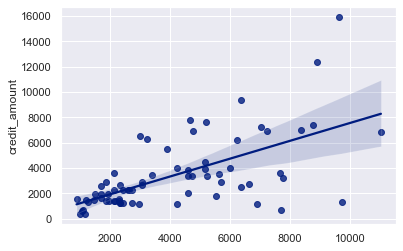

In [195]:
sns.regplot(tst_pred,test_y)

In [196]:
RDF_RMSE = np.sqrt(mean_squared_error(tst_pred,test_y))
score =  (1-(RDF_RMSE/100000))*100
print(score)
print(RDF_RMSE)

97.54539839183255
2454.601608167448


In [199]:
test = pd.read_csv('test.csv')
test_data = categorical_data_preprocessing_encoding(test)
test_data = pd.get_dummies(test_data,drop_first=True)
serial_number = test['serial number']
x=scaler.fit_transform(test_data)
final_1_pred = grd_model.predict(x)
temp = pd.DataFrame()
temp['s.no'] = serial_number
temp['credit_amount'] = final_1_pred
temp.head()
temp.to_csv('final_grd_Chinmay.csv',index=False)

# ADA-2

In [283]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators',10,300)
    learning_rate = trial.suggest_float('learning_rate',1e-7, 1e-1, log=True)
    min_impurity_decrease = trial.suggest_float('min_impurity_decrease',0.19, 2, log=True)
    subsample = trial.suggest_float('subsample',1e-6, 1, log=True)
    min_samples_split = trial.suggest_float('min_samples_split',1e-6, 0.99, log=True)
    min_weight_fraction_leaf = trial.suggest_float('min_weight_fraction_leaf',1e-6, 0.49, log=True)
    alpha = trial.suggest_float('alpha',0.1, 0.9, log=True)
    loss = trial.suggest_categorical('loss',['squared_error', 'absolute_error', 'huber','quantile'])
    random_state= trial.suggest_int('random_state',1,100)
    criterion = trial.suggest_categorical('criterion',['friedman_mse','squared_error','mse'])
    max_depth = trial.suggest_int('max_depth',2,5)
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes',2,5)
    model = GradientBoostingRegressor(n_estimators=n_estimators,learning_rate=learning_rate,loss=loss,random_state=random_state,max_depth=max_depth,criterion=criterion,
                                        min_impurity_decrease=min_impurity_decrease,max_leaf_nodes=max_leaf_nodes,subsample=subsample,
                                     min_samples_split=min_samples_split,min_weight_fraction_leaf=min_weight_fraction_leaf,
                                     alpha=alpha)
    cv_score = np.mean(cross_val_score(model,X_train_rfecv,train_y,scoring = 'neg_mean_squared_error',cv=10))
    return cv_score
# 3. Create a study object and optimize the objective function.
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2022-10-16 23:37:42,771] A new study created in memory with name: no-name-f639e332-50c2-4440-a05f-dbfb974e5ad5
[I 2022-10-16 23:37:44,765] Trial 0 finished with value: -8214649.42926228 and parameters: {'n_estimators': 193, 'learning_rate': 3.1086526073205736e-05, 'min_impurity_decrease': 1.9592303018500714, 'subsample': 0.6415427017554035, 'min_samples_split': 1.3154679304698414e-06, 'min_weight_fraction_leaf': 0.21059874133999165, 'alpha': 0.1397279293472794, 'loss': 'absolute_error', 'random_state': 39, 'criterion': 'squared_error', 'max_depth': 4, 'max_leaf_nodes': 5}. Best is trial 0 with value: -8214649.42926228.
[I 2022-10-16 23:37:47,276] Trial 1 finished with value: -7407975.742172988 and parameters: {'n_estimators': 298, 'learning_rate': 0.013832594818910051, 'min_impurity_decrease': 1.754987155180635, 'subsample': 0.0003381614444241309, 'min_samples_split': 1.7174783159590015e-06, 'min_weight_fraction_leaf': 0.33362313320109893, 'alpha': 0.4351182925892576, 'loss': 'quant

[I 2022-10-16 23:38:03,047] Trial 16 finished with value: -7350537.712871438 and parameters: {'n_estimators': 67, 'learning_rate': 0.0020687515230230296, 'min_impurity_decrease': 0.19097641949033028, 'subsample': 1.02766295595037e-06, 'min_samples_split': 0.004496130588869491, 'min_weight_fraction_leaf': 9.899259748012085e-06, 'alpha': 0.26138356600900137, 'loss': 'squared_error', 'random_state': 84, 'criterion': 'squared_error', 'max_depth': 4, 'max_leaf_nodes': 4}. Best is trial 10 with value: -7348136.196366796.
[I 2022-10-16 23:38:03,573] Trial 17 finished with value: -7348721.124211745 and parameters: {'n_estimators': 138, 'learning_rate': 4.9472349554328317e-05, 'min_impurity_decrease': 0.9032644970834708, 'subsample': 0.00022536605985289256, 'min_samples_split': 0.03412491687080158, 'min_weight_fraction_leaf': 0.00894526792974391, 'alpha': 0.17152169330914704, 'loss': 'squared_error', 'random_state': 66, 'criterion': 'squared_error', 'max_depth': 2, 'max_leaf_nodes': 3}. Best is

[I 2022-10-16 23:38:11,926] Trial 32 finished with value: -7344508.345672591 and parameters: {'n_estimators': 25, 'learning_rate': 2.8807930979353657e-05, 'min_impurity_decrease': 0.5367581791645133, 'subsample': 0.28129753153878756, 'min_samples_split': 3.441479312502099e-06, 'min_weight_fraction_leaf': 0.0025411254026248206, 'alpha': 0.43583674178794823, 'loss': 'squared_error', 'random_state': 91, 'criterion': 'friedman_mse', 'max_depth': 2, 'max_leaf_nodes': 4}. Best is trial 32 with value: -7344508.345672591.
[I 2022-10-16 23:38:12,299] Trial 33 finished with value: -7340637.027663002 and parameters: {'n_estimators': 58, 'learning_rate': 2.5016526925226975e-05, 'min_impurity_decrease': 0.49820114881095906, 'subsample': 0.19514698116081816, 'min_samples_split': 3.1679431645179497e-06, 'min_weight_fraction_leaf': 0.0028800154017376537, 'alpha': 0.43242080532059796, 'loss': 'squared_error', 'random_state': 84, 'criterion': 'friedman_mse', 'max_depth': 2, 'max_leaf_nodes': 4}. Best is

[I 2022-10-16 23:38:56,814] Trial 48 finished with value: -3747731.9754820094 and parameters: {'n_estimators': 241, 'learning_rate': 0.02072095263386545, 'min_impurity_decrease': 0.26607134952052686, 'subsample': 0.0467666946712232, 'min_samples_split': 6.187495338355876e-05, 'min_weight_fraction_leaf': 0.10054006509139804, 'alpha': 0.5194242988502894, 'loss': 'quantile', 'random_state': 45, 'criterion': 'friedman_mse', 'max_depth': 2, 'max_leaf_nodes': 5}. Best is trial 47 with value: -3649517.3960433463.
[I 2022-10-16 23:38:58,933] Trial 49 finished with value: -8144639.998084797 and parameters: {'n_estimators': 246, 'learning_rate': 0.02837823229923688, 'min_impurity_decrease': 0.2600864479199423, 'subsample': 0.04493106914986618, 'min_samples_split': 7.397799774534828e-05, 'min_weight_fraction_leaf': 0.09048771310071624, 'alpha': 0.5109974090492264, 'loss': 'quantile', 'random_state': 42, 'criterion': 'mse', 'max_depth': 3, 'max_leaf_nodes': 5}. Best is trial 47 with value: -364951

[I 2022-10-16 23:39:48,184] Trial 64 finished with value: -3844072.0406327667 and parameters: {'n_estimators': 257, 'learning_rate': 0.028765653232743132, 'min_impurity_decrease': 0.21585700030944735, 'subsample': 0.06382656396640929, 'min_samples_split': 0.03895695349568365, 'min_weight_fraction_leaf': 0.040404004666600005, 'alpha': 0.8975812493610866, 'loss': 'absolute_error', 'random_state': 15, 'criterion': 'friedman_mse', 'max_depth': 4, 'max_leaf_nodes': 5}. Best is trial 47 with value: -3649517.3960433463.
[I 2022-10-16 23:39:50,491] Trial 65 finished with value: -4959153.731333809 and parameters: {'n_estimators': 258, 'learning_rate': 0.03949366024322677, 'min_impurity_decrease': 0.20660503200162095, 'subsample': 0.11236428174306037, 'min_samples_split': 0.05787400619785466, 'min_weight_fraction_leaf': 0.04365734458057612, 'alpha': 0.8842357759093746, 'loss': 'absolute_error', 'random_state': 14, 'criterion': 'squared_error', 'max_depth': 4, 'max_leaf_nodes': 5}. Best is trial 

[I 2022-10-16 23:40:49,876] Trial 80 finished with value: -3423270.0463706134 and parameters: {'n_estimators': 237, 'learning_rate': 0.0551257649408631, 'min_impurity_decrease': 0.19982081068021748, 'subsample': 0.6747702596736286, 'min_samples_split': 0.2726942891046987, 'min_weight_fraction_leaf': 0.006099237459696305, 'alpha': 0.2655634670338066, 'loss': 'absolute_error', 'random_state': 45, 'criterion': 'friedman_mse', 'max_depth': 5, 'max_leaf_nodes': 5}. Best is trial 71 with value: -3288661.3062572307.
[I 2022-10-16 23:40:53,690] Trial 81 finished with value: -3558363.908602453 and parameters: {'n_estimators': 266, 'learning_rate': 0.05006848842232176, 'min_impurity_decrease': 0.20155646505996538, 'subsample': 0.3322597371798999, 'min_samples_split': 0.2864573724541111, 'min_weight_fraction_leaf': 0.011972269225645968, 'alpha': 0.3129263700321002, 'loss': 'absolute_error', 'random_state': 44, 'criterion': 'friedman_mse', 'max_depth': 5, 'max_leaf_nodes': 5}. Best is trial 71 wit

[I 2022-10-16 23:42:00,309] Trial 96 finished with value: -3482379.0749270767 and parameters: {'n_estimators': 262, 'learning_rate': 0.030085619086887498, 'min_impurity_decrease': 0.20431301823999093, 'subsample': 0.9687041340218301, 'min_samples_split': 0.26484435112137966, 'min_weight_fraction_leaf': 0.007384640972707307, 'alpha': 0.2765423280118526, 'loss': 'absolute_error', 'random_state': 51, 'criterion': 'friedman_mse', 'max_depth': 5, 'max_leaf_nodes': 5}. Best is trial 71 with value: -3288661.3062572307.
[I 2022-10-16 23:42:07,277] Trial 97 finished with value: -3459515.6676057754 and parameters: {'n_estimators': 289, 'learning_rate': 0.07452510038674554, 'min_impurity_decrease': 0.22169487768695037, 'subsample': 0.3831067004347652, 'min_samples_split': 0.2959675965460517, 'min_weight_fraction_leaf': 0.00671848243417511, 'alpha': 0.2677233143936199, 'loss': 'huber', 'random_state': 51, 'criterion': 'friedman_mse', 'max_depth': 5, 'max_leaf_nodes': 5}. Best is trial 71 with valu

In [284]:
print('best parameters : ',study.best_params)

best parameters :  {'n_estimators': 261, 'learning_rate': 0.09704038186385275, 'min_impurity_decrease': 0.22034985631488588, 'subsample': 0.8558937826376618, 'min_samples_split': 0.17794618351793892, 'min_weight_fraction_leaf': 0.007835256628617292, 'alpha': 0.272133047292423, 'loss': 'huber', 'random_state': 52, 'criterion': 'squared_error', 'max_depth': 5, 'max_leaf_nodes': 5}


<AxesSubplot:ylabel='credit_amount'>

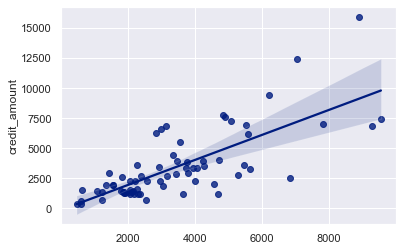

In [318]:
xgb_model = GradientBoostingRegressor(n_estimators=261,learning_rate=0.09704038186385275,loss='huber',random_state=47,
                                     criterion='squared_error',max_depth=5,max_leaf_nodes=5,subsample= 0.8053652438821016,
                                     min_impurity_decrease=0.22034985631488588,min_samples_split= 0.17794618351793892,
                                     min_weight_fraction_leaf=0.007835256628617292,alpha=0.272133047292423,warm_start=True,
                                     validation_fraction=0.4,n_iter_no_change=4781)
xgb_model.fit(X_train_rfecv,train_y)
tr_praid = xgb_model.predict(X_train_rfecv)
tst_pred = xgb_model.predict(X_test_rfecv)
sns.regplot(tst_pred,test_y)


In [319]:
RDF_RMSE = np.sqrt(mean_squared_error(tst_pred,test_y))
score =  (1-(RDF_RMSE/100000))*100
print(score)
print(RDF_RMSE)

98.09965342263477
1900.3465773652335


In [320]:
test = pd.read_csv('test.csv')
test_data = categorical_data_preprocessing_encoding(test)
test_data = pd.get_dummies(test_data,drop_first=True)
serial_number = test['serial number']
x=scaler.fit_transform(test_data)
final_1_pred = xgb_model.predict(x)
temp = pd.DataFrame()
temp['s.no'] = serial_number
temp['credit_amount'] = final_1_pred
temp.head()
temp.to_csv('00000000000000000Chinmay.csv',index=False)

# RF

In [ ]:
#best parameters :  {'n_estimators': 82, 'criterion': 'absolute_error', 'max_depth': 6}
#best parameters :  {'n_estimators': 151, 'criterion': 'absolute_error', 'max_depth': 6, 'max_features': None, 'random_state': 17}
#best parameters :  {'n_estimators': 168, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': 'auto', 'random_state': 21}

<AxesSubplot:ylabel='credit_amount'>

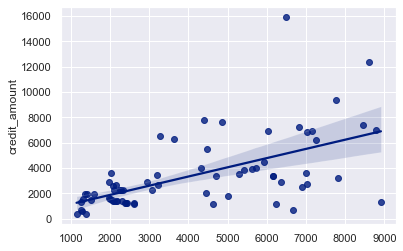

In [253]:
model = RandomForestRegressor(n_estimators=168,criterion='squared_error',max_depth=5,random_state=14,max_features='auto') 
#best parameters :  {'n_estimators': 68, 'criterion': 'absolute_error', 'max_depth': 5}
#{'n_estimators': 92, 'criterion': 'squared_error', 'max_depth': 5}
model.fit(X_train_rfecv,train_y)
tr_praid = model.predict(X_train_rfecv)
tst_pred = model.predict(X_test_rfecv)
sns.regplot(tst_pred,test_y)

In [254]:
RDF_RMSE = np.sqrt(mean_squared_error(tst_pred,test_y))
score =  (1-(RDF_RMSE/100000))*100
print(score)
print(RDF_RMSE)

97.52033110664016
2479.668893359844


In [248]:
test = pd.read_csv('test.csv')
test_data = categorical_data_preprocessing_encoding(test)
test_data = pd.get_dummies(test_data,drop_first=True)
serial_number = test['serial number']
x=scaler.fit_transform(test_data)
final_1_pred = model.predict(x)
temp = pd.DataFrame()
temp['s.no'] = serial_number
temp['credit_amount'] = final_1_pred
temp.head()
temp.to_csv('final_RF_NEW_1_Chinmay.csv',index=False)